##Load Data

In [ ]:
!nvidia-smi

Mon Jul 15 07:46:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copy datasets
!cp /content/drive/MyDrive/Datasets/Datasets2.zip .

In [ ]:
!unzip '/content/Datasets2.zip' -d '/content/'

Archive:  /content/Datasets2.zip
   creating: /content/Datasets2/
   creating: /content/Datasets2/Kiwi/
   creating: /content/Datasets2/Orange/
   creating: /content/Datasets2/Apple_Braeburn/
   creating: /content/Datasets2/Banana/
   creating: /content/Datasets2/Corn_Husk/
  inflating: /content/Datasets2/Kiwi/r_78_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_68_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_3_100.jpg  
  inflating: /content/Datasets2/Kiwi/45_100.jpg  
  inflating: /content/Datasets2/Kiwi/55_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_47_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_57_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_35_100.jpg  
  inflating: /content/Datasets2/Kiwi/37_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_325_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_61_100.jpg  
  inflating: /content/Datasets2/Kiwi/r_71_100.jpg  
  inflating: /content/Datasets2/Kiwi/63_100.jpg  
  inflating: /content/Datasets2/Kiwi/73_100.jpg  
  infla

In [ ]:
import os
os.rename('/content/Datasets2','/content/Datasets')

In [ ]:
#Count data
import os

# Define the paths to the directories
Apple_Braeburn_dir = "/content/Datasets/Apple_Braeburn"
Banana_dir = "/content/Datasets/Banana"
Corn_Husk_dir = "/content/Datasets/Corn_Husk"
Kiwi_dir = "/content/Datasets/Kiwi"
Orange_dir = "/content/Datasets/Orange"

# Use the os module to count the number of files in each directory
Apple_Braeburn_count = len(os.listdir(Apple_Braeburn_dir))
Banana_count = len(os.listdir(Banana_dir))
Corn_Husk_count = len(os.listdir(Corn_Husk_dir))
Kiwi_count = len(os.listdir(Kiwi_dir))
Orange_count = len(os.listdir(Orange_dir))

# Print the results
print(f"Number of files in {Apple_Braeburn_dir}: {Apple_Braeburn_count}")
print(f"Number of files in {Banana_dir}: {Banana_count}")
print(f"Number of files in {Corn_Husk_dir}: {Corn_Husk_count}")
print(f"Number of files in {Kiwi_dir}: {Kiwi_count}")
print(f"Number of files in {Orange_dir}: {Orange_count}")


Number of files in /content/Datasets/Apple_Braeburn: 164
Number of files in /content/Datasets/Banana: 166
Number of files in /content/Datasets/Corn_Husk: 154
Number of files in /content/Datasets/Kiwi: 156
Number of files in /content/Datasets/Orange: 160


In [ ]:
num_Apple_Braeburn = round(Apple_Braeburn_count*.15)
num_Banana = round(Banana_count*.15)
num_Corn_Husk = round(Corn_Husk_count*.15)
num_Kiwi = round(Kiwi_count*.15)
num_Orange = round(Orange_count*.15)

print(f"Validate for fiber : {num_Apple_Braeburn}")
print(f"Validate for fiber : {num_Banana}")
print(f"Validate for fiber : {num_Corn_Husk}")
print(f"Validate for fiber : {num_Kiwi}")
print(f"Validate for fiber : {num_Orange}")

Validate for fiber : 25
Validate for fiber : 25
Validate for fiber : 23
Validate for fiber : 23
Validate for fiber : 24


In [ ]:
import os
import random

# Define the paths to the source and test directories
source_dir = "/content/Datasets"
test_dir = "/content/test"

val_ratio = 0.2

# Define the number of files to select for each test category
num_Apple_Braeburn = round(Apple_Braeburn_count*val_ratio)
num_Banana = round(Banana_count*val_ratio)
num_Corn_Husk = round(Corn_Husk_count*val_ratio)
num_Kiwi = round(Kiwi_count*val_ratio)
num_Orange = round(Orange_count*val_ratio)

# Define the paths to the source directories for each test category
Apple_Braeburn_dir = os.path.join(source_dir, "Apple_Braeburn")
Banana_dir = os.path.join(source_dir, "Banana")
Corn_Husk_dir = os.path.join(source_dir, "Corn_Husk")
Kiwi_dir = os.path.join(source_dir, "Kiwi")
Orange_dir = os.path.join(source_dir, "Orange")

# Define the paths to the test directories for each test category
Apple_Braeburn_test_dir = os.path.join(test_dir, "Apple_Braeburn")
Banana_test_dir = os.path.join(test_dir, "Banana")
Corn_Husk_test_dir = os.path.join(test_dir, "Corn_Husk")
Kiwi_test_dir = os.path.join(test_dir, "Kiwi")
Orange_test_dir = os.path.join(test_dir, "Orange")

# Create the test directories if they don't already exist
os.makedirs(Apple_Braeburn_test_dir, exist_ok=True)
os.makedirs(Banana_test_dir, exist_ok=True)
os.makedirs(Corn_Husk_test_dir, exist_ok=True)
os.makedirs(Kiwi_test_dir, exist_ok=True)
os.makedirs(Orange_test_dir, exist_ok=True)

# Set the random seed for reproducibility
random.seed(42)

# Randomly select files from each source directory and move them to the corresponding test directory
Apple_Braeburn_files = random.sample(os.listdir(Apple_Braeburn_dir), num_Apple_Braeburn)
for f in Apple_Braeburn_files:
    src_file = os.path.join(Apple_Braeburn_dir, f)
    dst_file = os.path.join(Apple_Braeburn_test_dir, f)
    os.rename(src_file, dst_file)

Banana_files = random.sample(os.listdir(Banana_dir), num_Banana)
for f in Banana_files:
    src_file = os.path.join(Banana_dir, f)
    dst_file = os.path.join(Banana_test_dir, f)
    os.rename(src_file, dst_file)

Corn_Husk_files = random.sample(os.listdir(Corn_Husk_dir), num_Corn_Husk)
for f in Corn_Husk_files:
    src_file = os.path.join(Corn_Husk_dir, f)
    dst_file = os.path.join(Corn_Husk_test_dir, f)
    os.rename(src_file, dst_file)

Kiwi_files = random.sample(os.listdir(Kiwi_dir), num_Kiwi)
for f in Kiwi_files:
    src_file = os.path.join(Kiwi_dir, f)
    dst_file = os.path.join(Kiwi_test_dir, f)
    os.rename(src_file, dst_file)

Orange_files = random.sample(os.listdir(Orange_dir), num_Orange)
for f in Orange_files:
    src_file = os.path.join(Orange_dir, f)
    dst_file = os.path.join(Orange_test_dir, f)
    os.rename(src_file, dst_file)


In [ ]:
#Count data
import os

# Define the paths to the directories
Apple_Braeburn_dir = "/content/Datasets/Apple_Braeburn"
Banana_dir = "/content/Datasets/Banana"
Corn_Husk_dir = "/content/Datasets/Corn_Husk"
Kiwi_dir = "/content/Datasets/Kiwi"
Orange_dir = "/content/Datasets/Orange"

# Use the os module to count the number of files in each directory
Apple_Braeburn_count = len(os.listdir(Apple_Braeburn_dir))
Banana_count = len(os.listdir(Banana_dir))
Corn_Husk_count = len(os.listdir(Corn_Husk_dir))
Kiwi_count = len(os.listdir(Kiwi_dir))
Orange_count = len(os.listdir(Orange_dir))

# Print the results
print(f"Number of files in {Apple_Braeburn_dir}: {Apple_Braeburn_count}")
print(f"Number of files in {Banana_dir}: {Banana_count}")
print(f"Number of files in {Corn_Husk_dir}: {Corn_Husk_count}")
print(f"Number of files in {Kiwi_dir}: {Kiwi_count}")
print(f"Number of files in {Orange_dir}: {Orange_count}")


Number of files in /content/Datasets/Apple_Braeburn: 131
Number of files in /content/Datasets/Banana: 133
Number of files in /content/Datasets/Corn_Husk: 123
Number of files in /content/Datasets/Kiwi: 125
Number of files in /content/Datasets/Orange: 128


In [ ]:
#Count data
import os

# Define the paths to the directories
Apple_Braeburn_dir = "/content/Datasets/Apple_Braeburn"
Banana_dir = "/content/Datasets/Banana"
Corn_Husk_dir = "/content/Datasets/Corn_Husk"
Kiwi_dir = "/content/Datasets/Kiwi"
Orange_dir = "/content/Datasets/Orange"

# Use the os module to count the number of files in each directory
Apple_Braeburn_count = len(os.listdir(Apple_Braeburn_dir))
Banana_count = len(os.listdir(Banana_dir))
Corn_Husk_count = len(os.listdir(Corn_Husk_dir))
Kiwi_count = len(os.listdir(Kiwi_dir))
Orange_count = len(os.listdir(Orange_dir))

# Print the results
print(f"Number of files in {Apple_Braeburn_dir}: {Apple_Braeburn_count}")
print(f"Number of files in {Banana_dir}: {Banana_count}")
print(f"Number of files in {Corn_Husk_dir}: {Corn_Husk_count}")
print(f"Number of files in {Kiwi_dir}: {Kiwi_count}")
print(f"Number of files in {Orange_dir}: {Orange_count}")


Number of files in /content/Datasets/Apple_Braeburn: 131
Number of files in /content/Datasets/Banana: 133
Number of files in /content/Datasets/Corn_Husk: 123
Number of files in /content/Datasets/Kiwi: 125
Number of files in /content/Datasets/Orange: 128


#Install Timm

In [ ]:
# Install Timm (Need to restart the runtime after finish install )
!pip install git+https://github.com/rwightman/pytorch-image-models.git
!pip install lightning transformers datasets evaluate pillow==9.2.0

  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-u10ul4d8
  Running command git clone --filter=blob:none --quiet https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-u10ul4d8
  Resolved https://github.com/rwightman/pytorch-image-models.git to commit 3196d6b131dd89ac0bf343efb039025fdb895efa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import DataLoader, random_split, Dataset

# Pytorch Image model (TIMM) library: a library for state-of-the-art image classification
import timm
import timm.optim
import timm.scheduler
from timm.data import ImageDataset, create_dataset, create_loader
from timm.data.transforms_factory import create_transform

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from PIL import Image

import evaluate

import numpy as np
import pandas as pd
from scipy import stats

from tqdm.notebook import tqdm

import glob

from sklearn.model_selection import StratifiedKFold,KFold

from lightning.fabric import Fabric

from copy import copy

import shutil

from sklearn.utils.class_weight import compute_class_weight

##visualization Model

In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
# Select model (List of available is shown above)
mobilenetv3_large_100 = "hf_hub:timm/mobilenetv3_large_100.miil_in21k_ft_in1k"
mobilenetv3_large_100_model= timm.create_model(mobilenetv3_large_100, pretrained=True, num_classes=5)
# Print a summary using torchinfo (uncomment for actual output)
summary(model=mobilenetv3_large_100_model,
        input_size=(16, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                          [16, 3, 224, 224]    [16, 5]              --                   True
├─Conv2d (conv_stem)                               [16, 3, 224, 224]    [16, 16, 112, 112]   432                  True
├─BatchNormAct2d (bn1)                             [16, 16, 112, 112]   [16, 16, 112, 112]   32                   True
│    └─Identity (drop)                             [16, 16, 112, 112]   [16, 16, 112, 112]   --                   --
│    └─Hardswish (act)                             [16, 16, 112, 112]   [16, 16, 112, 112]   --                   --
├─Sequential (blocks)                              [16, 16, 112, 112]   [16, 960, 7, 7]      --                   True
│    └─Sequential (0)                              [16, 16, 112, 112]   [16, 16, 112, 112]   --                   True
│    │    └─DepthwiseSeparableConv (0)         

In [ ]:
# Transform image data based on ImageNet's mean and std
transforms = {
    "train": T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=torch.tensor([0.4850, 0.4560, 0.4060]), std=torch.tensor([0.2290, 0.2240, 0.2250]))
    ]),
    "test": T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=torch.tensor([0.4850, 0.4560, 0.4060]), std=torch.tensor([0.2290, 0.2240, 0.2250]))
    ])
}

In [ ]:
train_dir = '/content/Datasets'

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
dataset = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=transforms["train"], # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

In [ ]:
dataset.class_to_idx

{'Apple_Braeburn': 0, 'Banana': 1, 'Corn_Husk': 2, 'Kiwi': 3, 'Orange': 4}

In [ ]:
len(dataset)

640

In [ ]:
# Select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
#Select Model
model_name = "hf_hub:timm/mobilenetv3_large_100.miil_in21k_ft_in1k"

In [ ]:
num_epochs = 5
criterion = nn.CrossEntropyLoss()

# Cross Validation Configuration
k_splits = 5
metric = evaluate.load("accuracy")

In [ ]:
# Cross validation
kf = KFold(n_splits=k_splits, shuffle=True, random_state=42)

In [ ]:
# Gradient Accumulation Settings
# Set to 1 for no accumulation
train_batch_size = 16
eval_batch_size = 8
num_accumulate = 1

In [ ]:
torch.set_float32_matmul_precision('high')
fabric = Fabric(accelerator="cuda", precision="16-mixed")
fabric.launch()

INFO: Using 16-bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16-bit Automatic Mixed Precision (AMP)


In [ ]:
import time

In [ ]:
%%time
all_eval_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"Fold {fold+1} of {k_splits}")

    # Load Model
    model = timm.create_model(model_name, pretrained=True, num_classes=5)


    # Load Optimizer and Scheduler
    optimizer = timm.optim.create_optimizer_v2(model, opt="AdamW", lr=5e-4)
    # optimizer = timm.optim.Lookahead(optimizer, alpha=0.5, k=6)    # update the slow weight every k steps
                                                                   # update the optimizer by combine slow weight and fast weight * alpha

    model, optimizer = fabric.setup(model, optimizer)

    scheduler = timm.scheduler.create_scheduler_v2(optimizer, num_epochs=num_epochs)[0]

    # Load Data: split train and valition set based on kfold
    train_dataset = torch.utils.data.Subset(dataset, train_idx)
    val_dataset = torch.utils.data.Subset(dataset, val_idx)

    train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False, num_workers=4, pin_memory=True)

    train_dataloader, val_dataloader = fabric.setup_dataloaders(train_dataloader, val_dataloader)

    # Reset Model Info
    info = {
        "metric_train": [],
        "metric_val": [],
        "train_loss": [],
        "val_loss": [],
        "best_metric_val": -999,
        "best_val_loss": 999,
    }

    for epoch in range(num_epochs):
        train_loss_epoch = []
        val_loss_epoch = []

        train_preds = []
        train_targets = []

        val_preds = []
        val_targets = []

        num_updates = epoch * len(train_dataloader)

        ### === Train Loop === ###
        ## Time
        s1 = time.time()

        model.train()
        for idx, batch in enumerate(tqdm(train_dataloader)):
            inputs, targets = batch
            # inputs = {k: v.to(device) for k,v in inputs.items()}
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            fabric.backward(loss)

            # === Gradient Accumulation === #
            if ((idx + 1) % num_accumulate == 0) or (idx + 1 == len(train_dataloader)):
                optimizer.step()
                scheduler.step_update(num_updates=num_updates)
                optimizer.zero_grad()
            # ============================= #

            train_loss_epoch.append(loss.item())
            train_preds += outputs.argmax(-1).detach().cpu().tolist()
            train_targets += targets.tolist()
        ### ==================== ###

        # optimizer.sync_lookahead()              # Sync slow weight and fast weight
        scheduler.step(epoch + 1)

        ### === Evaluation Loop === ###
        model.eval()
        with torch.no_grad():
            for batch in tqdm(val_dataloader):
                inputs, targets = batch
                # inputs = {k: v.to(device) for k,v in inputs.items()}
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                # Log Values
                val_loss_epoch.append(loss.item())
                val_preds += outputs.argmax(-1).detach().cpu().tolist()
                val_targets += targets.tolist()
        ### ======================= ###
        ## Time train finish
        s2 = time.time()
        elapsed_time = s2 - s1


        # Log Data
        metric_train = metric.compute(predictions=train_preds, references=train_targets)["accuracy"]
        metric_val = metric.compute(predictions=val_preds, references=val_targets)["accuracy"]

        info["metric_train"].append(metric_train)
        info["metric_val"].append(metric_val)

        info["train_loss"].append(np.average(train_loss_epoch))
        info["val_loss"].append(np.average(val_loss_epoch))

        if metric_val > info["best_metric_val"]:
        # if info["val_loss"][-1] < info["best_val_loss"]:
            print("New Best Score!")
            # print("New Best Val Loss")
            info["best_metric_val"] = metric_val
            # info["best_val_loss"] = info["val_loss"][-1]
            torch.save(model, f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")

        print(f"Using time of Fold: {fold} | Epoch: {epoch} | {elapsed_time} second ")
        print(info)
        print(f"Fold: {fold} | Epoch: {epoch} | Metric: {metric_val} | Training Loss: {np.average(train_loss_epoch)} | Validation Loss: {np.average(val_loss_epoch)}")

    # save all best metric val
    all_eval_scores.append(info["best_metric_val"])


Fold 1 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 0 | Epoch: 0 | 4.469229459762573 second 
{'metric_train': [0.71875], 'metric_val': [0.9921875], 'train_loss': [2.4908087615313907], 'val_loss': [0.024863834191336087], 'best_metric_val': 0.9921875, 'best_val_loss': 999}
Fold: 0 | Epoch: 0 | Metric: 0.9921875 | Training Loss: 2.4908087615313907 | Validation Loss: 0.024863834191336087


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 0 | Epoch: 1 | 3.8498241901397705 second 
{'metric_train': [0.71875, 0.994140625], 'metric_val': [0.9921875, 0.7578125], 'train_loss': [2.4908087615313907, 0.011512145142867192], 'val_loss': [0.024863834191336087, 11.196631934438642], 'best_metric_val': 0.9921875, 'best_val_loss': 999}
Fold: 0 | Epoch: 1 | Metric: 0.7578125 | Training Loss: 0.011512145142867192 | Validation Loss: 11.196631934438642


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 0 | Epoch: 2 | 5.097529888153076 second 
{'metric_train': [0.71875, 0.994140625, 0.99609375], 'metric_val': [0.9921875, 0.7578125, 1.0], 'train_loss': [2.4908087615313907, 0.011512145142867192, 0.024112583813133054], 'val_loss': [0.024863834191336087, 11.196631934438642, 4.2658368641368405e-06], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.024112583813133054 | Validation Loss: 4.2658368641368405e-06


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 0 | Epoch: 3 | 3.3315415382385254 second 
{'metric_train': [0.71875, 0.994140625, 0.99609375, 0.994140625], 'metric_val': [0.9921875, 0.7578125, 1.0, 1.0], 'train_loss': [2.4908087615313907, 0.011512145142867192, 0.024112583813133054, 0.055426142758336974], 'val_loss': [0.024863834191336087, 11.196631934438642, 4.2658368641368405e-06, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.055426142758336974 | Validation Loss: 0.0


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 0 | Epoch: 4 | 3.328097105026245 second 
{'metric_train': [0.71875, 0.994140625, 0.99609375, 0.994140625, 0.9921875], 'metric_val': [0.9921875, 0.7578125, 1.0, 1.0, 1.0], 'train_loss': [2.4908087615313907, 0.011512145142867192, 0.024112583813133054, 0.055426142758336974, 0.03370270816140039], 'val_loss': [0.024863834191336087, 11.196631934438642, 4.2658368641368405e-06, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 0 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.03370270816140039 | Validation Loss: 0.0
Fold 2 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 1 | Epoch: 0 | 3.8389971256256104 second 
{'metric_train': [0.921875], 'metric_val': [0.9921875], 'train_loss': [0.5424924555415448], 'val_loss': [0.022178158069408926], 'best_metric_val': 0.9921875, 'best_val_loss': 999}
Fold: 1 | Epoch: 0 | Metric: 0.9921875 | Training Loss: 0.5424924555415448 | Validation Loss: 0.022178158069408926


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 1 | Epoch: 1 | 5.360090017318726 second 
{'metric_train': [0.921875, 0.9765625], 'metric_val': [0.9921875, 0.9765625], 'train_loss': [0.5424924555415448, 0.2024920266651219], 'val_loss': [0.022178158069408926, 0.12115681228320341], 'best_metric_val': 0.9921875, 'best_val_loss': 999}
Fold: 1 | Epoch: 1 | Metric: 0.9765625 | Training Loss: 0.2024920266651219 | Validation Loss: 0.12115681228320341


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 1 | Epoch: 2 | 3.418182134628296 second 
{'metric_train': [0.921875, 0.9765625, 0.99609375], 'metric_val': [0.9921875, 0.9765625, 1.0], 'train_loss': [0.5424924555415448, 0.2024920266651219, 0.05967408943050059], 'val_loss': [0.022178158069408926, 0.12115681228320341, 3.7252894102834944e-09], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.05967408943050059 | Validation Loss: 3.7252894102834944e-09


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 1 | Epoch: 3 | 3.5905182361602783 second 
{'metric_train': [0.921875, 0.9765625, 0.99609375, 0.998046875], 'metric_val': [0.9921875, 0.9765625, 1.0, 1.0], 'train_loss': [0.5424924555415448, 0.2024920266651219, 0.05967408943050059, 0.010583025777734553], 'val_loss': [0.022178158069408926, 0.12115681228320341, 3.7252894102834944e-09, 8.977654171182792e-07], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.010583025777734553 | Validation Loss: 8.977654171182792e-07


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 1 | Epoch: 4 | 4.027458429336548 second 
{'metric_train': [0.921875, 0.9765625, 0.99609375, 0.998046875, 0.998046875], 'metric_val': [0.9921875, 0.9765625, 1.0, 1.0, 1.0], 'train_loss': [0.5424924555415448, 0.2024920266651219, 0.05967408943050059, 0.010583025777734553, 0.022341303563772813], 'val_loss': [0.022178158069408926, 0.12115681228320341, 3.7252894102834944e-09, 8.977654171182792e-07, 3.911545909396352e-08], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 1 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.022341303563772813 | Validation Loss: 3.911545909396352e-08
Fold 3 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 2 | Epoch: 0 | 5.391998767852783 second 
{'metric_train': [0.9140625], 'metric_val': [0.9375], 'train_loss': [0.8325198202699121], 'val_loss': [0.4642862845108766], 'best_metric_val': 0.9375, 'best_val_loss': 999}
Fold: 2 | Epoch: 0 | Metric: 0.9375 | Training Loss: 0.8325198202699121 | Validation Loss: 0.4642862845108766


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 2 | Epoch: 1 | 3.422347068786621 second 
{'metric_train': [0.9140625, 0.98828125], 'metric_val': [0.9375, 0.984375], 'train_loss': [0.8325198202699121, 0.13002391722367546], 'val_loss': [0.4642862845108766, 0.054151817457587015], 'best_metric_val': 0.984375, 'best_val_loss': 999}
Fold: 2 | Epoch: 1 | Metric: 0.984375 | Training Loss: 0.13002391722367546 | Validation Loss: 0.054151817457587015


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 2 | Epoch: 2 | 3.384300947189331 second 
{'metric_train': [0.9140625, 0.98828125, 0.98828125], 'metric_val': [0.9375, 0.984375, 1.0], 'train_loss': [0.8325198202699121, 0.13002391722367546, 0.05333809105941327], 'val_loss': [0.4642862845108766, 0.054151817457587015, 9.313225191043273e-10], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 2 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.05333809105941327 | Validation Loss: 9.313225191043273e-10


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 2 | Epoch: 3 | 4.040407180786133 second 
{'metric_train': [0.9140625, 0.98828125, 0.98828125, 0.998046875], 'metric_val': [0.9375, 0.984375, 1.0, 1.0], 'train_loss': [0.8325198202699121, 0.13002391722367546, 0.05333809105941327, 0.0031501228184031838], 'val_loss': [0.4642862845108766, 0.054151817457587015, 9.313225191043273e-10, 1.8626449271863521e-09], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 2 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.0031501228184031838 | Validation Loss: 1.8626449271863521e-09


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 2 | Epoch: 4 | 5.221016883850098 second 
{'metric_train': [0.9140625, 0.98828125, 0.98828125, 0.998046875, 0.98828125], 'metric_val': [0.9375, 0.984375, 1.0, 1.0, 1.0], 'train_loss': [0.8325198202699121, 0.13002391722367546, 0.05333809105941327, 0.0031501228184031838, 0.07780991389391122], 'val_loss': [0.4642862845108766, 0.054151817457587015, 9.313225191043273e-10, 1.8626449271863521e-09, 2.635601079603589e-07], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 2 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.07780991389391122 | Validation Loss: 2.635601079603589e-07
Fold 4 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 3 | Epoch: 0 | 3.462632894515991 second 
{'metric_train': [0.943359375], 'metric_val': [0.9609375], 'train_loss': [0.48871745313764126], 'val_loss': [0.9634407777339218], 'best_metric_val': 0.9609375, 'best_val_loss': 999}
Fold: 3 | Epoch: 0 | Metric: 0.9609375 | Training Loss: 0.48871745313764126 | Validation Loss: 0.9634407777339218


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 3 | Epoch: 1 | 3.5086841583251953 second 
{'metric_train': [0.943359375, 0.970703125], 'metric_val': [0.9609375, 1.0], 'train_loss': [0.48871745313764126, 0.1812901257679593], 'val_loss': [0.9634407777339218, 0.0007200346808531322], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 1 | Metric: 1.0 | Training Loss: 0.1812901257679593 | Validation Loss: 0.0007200346808531322


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 2 | 4.16023325920105 second 
{'metric_train': [0.943359375, 0.970703125, 0.9921875], 'metric_val': [0.9609375, 1.0, 1.0], 'train_loss': [0.48871745313764126, 0.1812901257679593, 0.08231361488491218], 'val_loss': [0.9634407777339218, 0.0007200346808531322, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.08231361488491218 | Validation Loss: 0.0


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 3 | 5.310936212539673 second 
{'metric_train': [0.943359375, 0.970703125, 0.9921875, 0.99609375], 'metric_val': [0.9609375, 1.0, 1.0, 1.0], 'train_loss': [0.48871745313764126, 0.1812901257679593, 0.08231361488491218, 0.03430353261061336], 'val_loss': [0.9634407777339218, 0.0007200346808531322, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.03430353261061336 | Validation Loss: 0.0


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 3 | Epoch: 4 | 3.4714515209198 second 
{'metric_train': [0.943359375, 0.970703125, 0.9921875, 0.99609375, 0.998046875], 'metric_val': [0.9609375, 1.0, 1.0, 1.0, 1.0], 'train_loss': [0.48871745313764126, 0.1812901257679593, 0.08231361488491218, 0.03430353261061336, 0.041078296863317626], 'val_loss': [0.9634407777339218, 0.0007200346808531322, 0.0, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 3 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.041078296863317626 | Validation Loss: 0.0
Fold 5 of 5


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

New Best Score!
Using time of Fold: 4 | Epoch: 0 | 3.5500547885894775 second 
{'metric_train': [0.912109375], 'metric_val': [1.0], 'train_loss': [0.7891556095116319], 'val_loss': [8.424989856337106e-05], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 0 | Metric: 1.0 | Training Loss: 0.7891556095116319 | Validation Loss: 8.424989856337106e-05


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 4 | Epoch: 1 | 4.1345038414001465 second 
{'metric_train': [0.912109375, 0.984375], 'metric_val': [1.0, 0.9765625], 'train_loss': [0.7891556095116319, 0.10824731614843053], 'val_loss': [8.424989856337106e-05, 0.03179083788199932], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 1 | Metric: 0.9765625 | Training Loss: 0.10824731614843053 | Validation Loss: 0.03179083788199932


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 4 | Epoch: 2 | 5.328128814697266 second 
{'metric_train': [0.912109375, 0.984375, 0.98828125], 'metric_val': [1.0, 0.9765625, 1.0], 'train_loss': [0.7891556095116319, 0.10824731614843053, 0.20838582220250768], 'val_loss': [8.424989856337106e-05, 0.03179083788199932, 1.8626444386882213e-08], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 2 | Metric: 1.0 | Training Loss: 0.20838582220250768 | Validation Loss: 1.8626444386882213e-08


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 4 | Epoch: 3 | 3.4973862171173096 second 
{'metric_train': [0.912109375, 0.984375, 0.98828125, 0.994140625], 'metric_val': [1.0, 0.9765625, 1.0, 1.0], 'train_loss': [0.7891556095116319, 0.10824731614843053, 0.20838582220250768, 0.05641077570930264], 'val_loss': [8.424989856337106e-05, 0.03179083788199932, 1.8626444386882213e-08, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 3 | Metric: 1.0 | Training Loss: 0.05641077570930264 | Validation Loss: 0.0


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

Using time of Fold: 4 | Epoch: 4 | 4.8472840785980225 second 
{'metric_train': [0.912109375, 0.984375, 0.98828125, 0.994140625, 1.0], 'metric_val': [1.0, 0.9765625, 1.0, 1.0, 1.0], 'train_loss': [0.7891556095116319, 0.10824731614843053, 0.20838582220250768, 0.05641077570930264, 0.0002857866529639014], 'val_loss': [8.424989856337106e-05, 0.03179083788199932, 1.8626444386882213e-08, 0.0, 0.0], 'best_metric_val': 1.0, 'best_val_loss': 999}
Fold: 4 | Epoch: 4 | Metric: 1.0 | Training Loss: 0.0002857866529639014 | Validation Loss: 0.0
CPU times: user 1min 2s, sys: 12.3 s, total: 1min 14s
Wall time: 1min 46s


In [ ]:
classname = dataset.classes
classname

['Apple_Braeburn', 'Banana', 'Corn_Husk', 'Kiwi', 'Orange']

  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 0


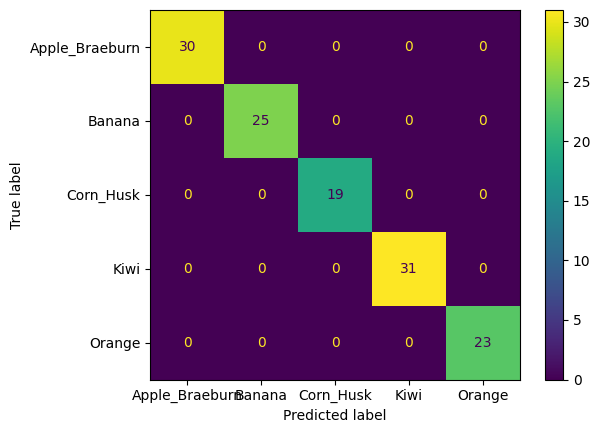

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        30
        Banana       1.00      1.00      1.00        25
     Corn_Husk       1.00      1.00      1.00        19
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        23

      accuracy                           1.00       128
     macro avg       1.00      1.00      1.00       128
  weighted avg       1.00      1.00      1.00       128



  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 1


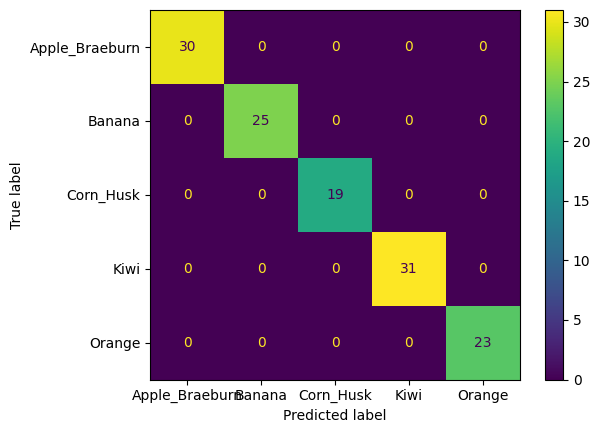

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        30
        Banana       1.00      1.00      1.00        25
     Corn_Husk       1.00      1.00      1.00        19
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        23

      accuracy                           1.00       128
     macro avg       1.00      1.00      1.00       128
  weighted avg       1.00      1.00      1.00       128



  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 2


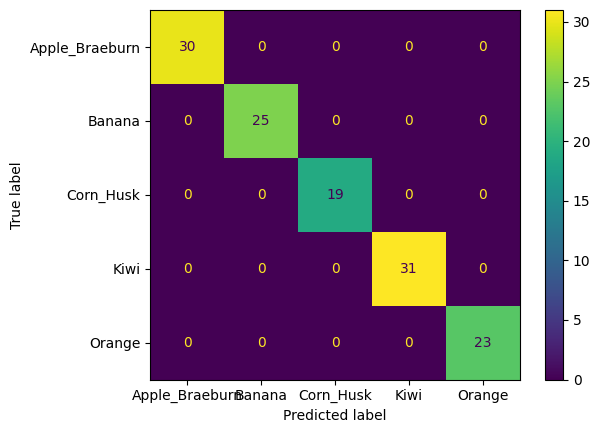

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        30
        Banana       1.00      1.00      1.00        25
     Corn_Husk       1.00      1.00      1.00        19
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        23

      accuracy                           1.00       128
     macro avg       1.00      1.00      1.00       128
  weighted avg       1.00      1.00      1.00       128



  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 3


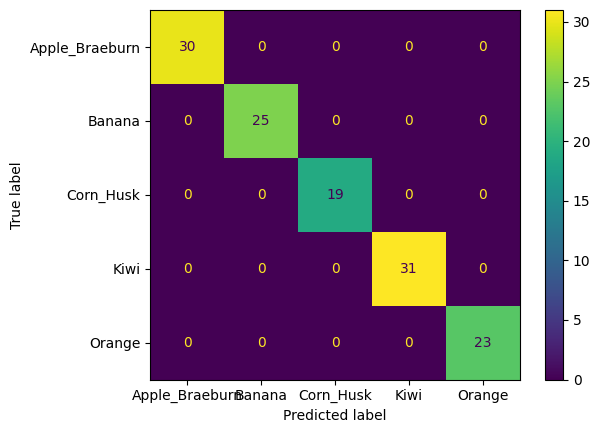

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        30
        Banana       1.00      1.00      1.00        25
     Corn_Husk       1.00      1.00      1.00        19
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        23

      accuracy                           1.00       128
     macro avg       1.00      1.00      1.00       128
  weighted avg       1.00      1.00      1.00       128



  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 4


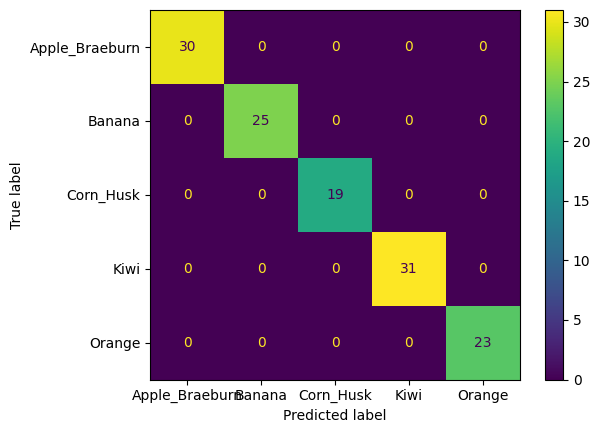

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        30
        Banana       1.00      1.00      1.00        25
     Corn_Husk       1.00      1.00      1.00        19
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        23

      accuracy                           1.00       128
     macro avg       1.00      1.00      1.00       128
  weighted avg       1.00      1.00      1.00       128



In [ ]:
for fold in range(k_splits):
    predictions = []
    references = []

    # load model
    loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")
    # Evaluation
    loaded_model.eval()
    with torch.no_grad():
        for batch in tqdm(val_dataloader):
            inputs, targets = batch
            outputs = loaded_model(inputs.to(device))

            # Log Values
            predictions += outputs.argmax(-1).detach().cpu().tolist()
            references += targets.tolist()

    print(f"Fold: {fold}")

    # Confusion matrix
    cm = confusion_matrix(references, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classname)
    disp.plot()
    plt.show()

    # Classification Report
    print(classification_report(references, predictions, target_names=classname))

In [ ]:
classname = dataset.classes
classname

['Apple_Braeburn', 'Banana', 'Corn_Husk', 'Kiwi', 'Orange']

###Verification by sepreate data

In [ ]:
test_folder = '/content/test'

In [ ]:
# Making Dataset
from torchvision import datasets
test_dataset = datasets.ImageFolder(root=test_folder, # target folder of images
                                  transform=transforms["test"], # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

In [ ]:
len(test_dataset)

160

In [ ]:
# Making test dataloader
test_dataloader = DataLoader(test_dataset, batch_size=eval_batch_size, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
test_dataset.classes

['Apple_Braeburn', 'Banana', 'Corn_Husk', 'Kiwi', 'Orange']

In [ ]:
len(test_dataloader)

20

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 0


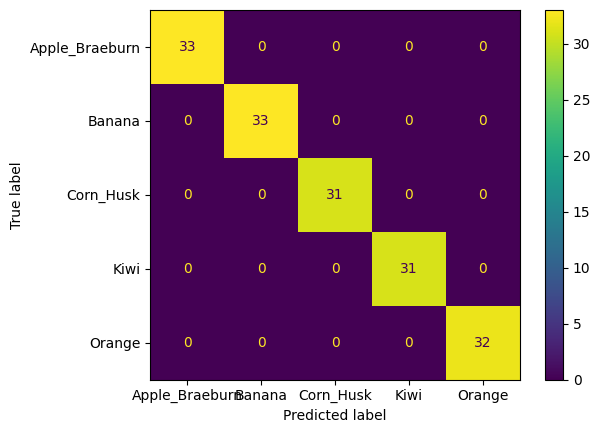

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        33
        Banana       1.00      1.00      1.00        33
     Corn_Husk       1.00      1.00      1.00        31
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        32

      accuracy                           1.00       160
     macro avg       1.00      1.00      1.00       160
  weighted avg       1.00      1.00      1.00       160



  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 1


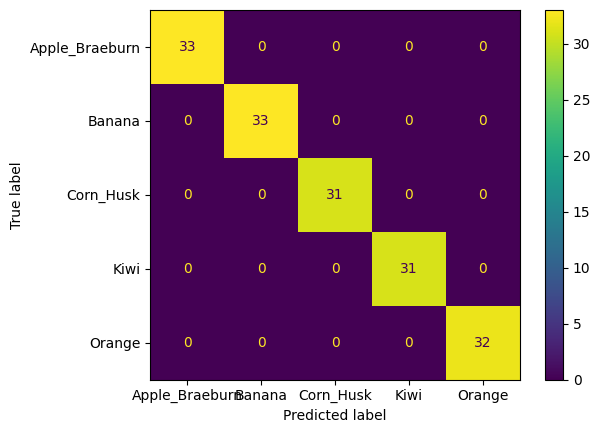

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        33
        Banana       1.00      1.00      1.00        33
     Corn_Husk       1.00      1.00      1.00        31
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        32

      accuracy                           1.00       160
     macro avg       1.00      1.00      1.00       160
  weighted avg       1.00      1.00      1.00       160



  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 2


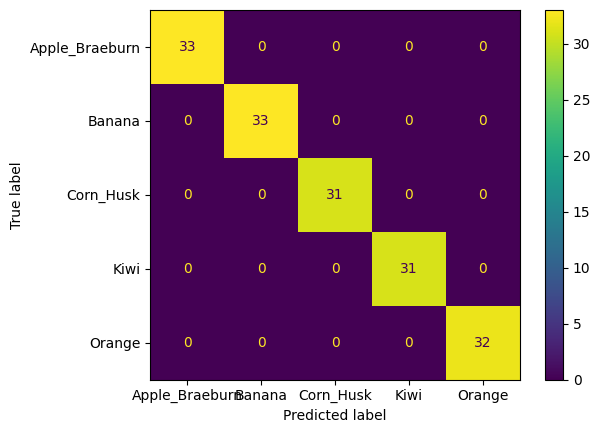

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        33
        Banana       1.00      1.00      1.00        33
     Corn_Husk       1.00      1.00      1.00        31
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        32

      accuracy                           1.00       160
     macro avg       1.00      1.00      1.00       160
  weighted avg       1.00      1.00      1.00       160



  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 3


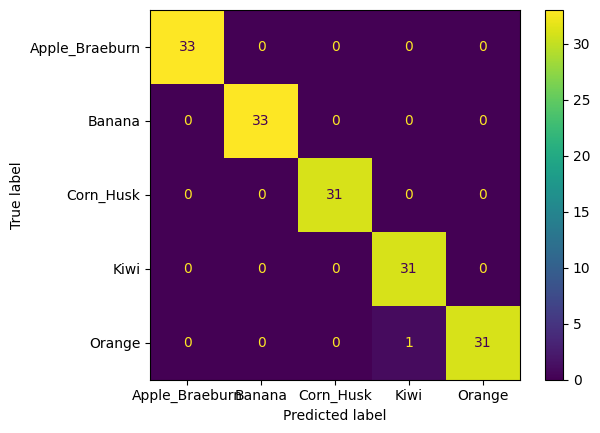

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        33
        Banana       1.00      1.00      1.00        33
     Corn_Husk       1.00      1.00      1.00        31
          Kiwi       0.97      1.00      0.98        31
        Orange       1.00      0.97      0.98        32

      accuracy                           0.99       160
     macro avg       0.99      0.99      0.99       160
  weighted avg       0.99      0.99      0.99       160



  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fold: 4


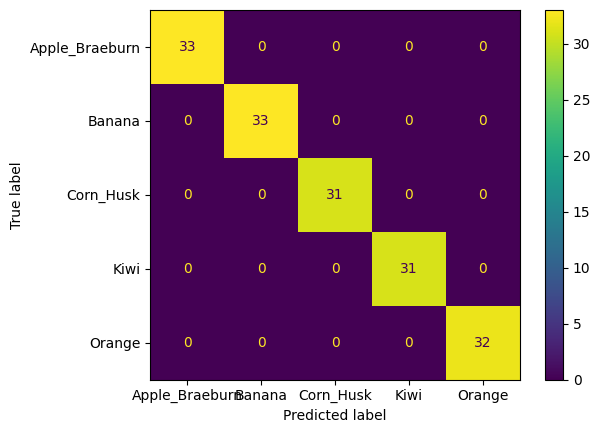

                precision    recall  f1-score   support

Apple_Braeburn       1.00      1.00      1.00        33
        Banana       1.00      1.00      1.00        33
     Corn_Husk       1.00      1.00      1.00        31
          Kiwi       1.00      1.00      1.00        31
        Orange       1.00      1.00      1.00        32

      accuracy                           1.00       160
     macro avg       1.00      1.00      1.00       160
  weighted avg       1.00      1.00      1.00       160



In [ ]:
for fold in range(k_splits):
    predictions = []
    references = []

    # load model
    loaded_model = torch.load(f"mobilenetv3_large_100_checkpoint_fold{fold}.pt")
    # Evaluation
    loaded_model.eval()
    with torch.no_grad():
        for batch in tqdm(test_dataloader):
            inputs, targets = batch
            outputs = loaded_model(inputs.to(device))

            # Log Values
            predictions += outputs.argmax(-1).detach().cpu().tolist()
            references += targets.tolist()

    print(f"Fold: {fold}")

    # Confusion matrix
    cm = confusion_matrix(references, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classname)
    disp.plot()
    plt.show()

    # Classification Report
    print(classification_report(references, predictions, target_names=classname))

##Visualization train model result

In [ ]:
## Making Pridcition return class & prob
from typing import List, Tuple

from PIL import Image
def pred_class(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: T = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    classname =  class_names[target_image_pred_label]
    prob = target_image_pred_probs.max().cpu().numpy()

    return classname , prob

In [ ]:
##Load some model
loaded_model = torch.load('/content/mobilenetv3_large_100_checkpoint_fold0.pt')

##Train data visulization

In [ ]:
#Making df for random
import os
import pandas as pd
from PIL import Image

# create an empty list to store image paths
image_paths = []

# loop through each subfolder in the "Image" directory
for root, dirs, files in os.walk('/content/test'):
    for subfolder_name in dirs:
        # get the path to the subfolder
        subfolder_path = os.path.join(root, subfolder_name)
        # loop through each file in the subfolder
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            image_paths.append((image_path, subfolder_name))

# create a DataFrame from the list of image paths
df = pd.DataFrame(image_paths, columns=['path', 'subfolder_name'])


In [ ]:
df.head()

path subfolder_name
0  /content/test/Banana/r_240_100.jpg         Banana
1   /content/test/Banana/r_68_100.jpg         Banana
2   /content/test/Banana/r_14_100.jpg         Banana
3   /content/test/Banana/r_33_100.jpg         Banana
4  /content/test/Banana/r_319_100.jpg         Banana

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



def sample_picture(df=df,random_state=None):
    # Sample 20 random rows from the DataFrame
    sample_df = df.sample(20, random_state=random_state).copy()
    sample_df = sample_df.reset_index(drop=True)
    # Define the grid layout for displaying the images
    num_rows = 4
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    fig.tight_layout(pad=5.0)

    # Iterate over the sampled rows and display the images in the grid
    for i, row in sample_df.iterrows():
        img = Image.open(row['path'])

        # Prediction
        pred_name , prob = pred_class(model=loaded_model,image_path=row['path'],
                   class_names = classname,
                   transform=transforms["test"])

        row_idx = i // num_cols
        col_idx = i % num_cols
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].axis('on')
        axs[row_idx, col_idx].set_title(row['subfolder_name'] + ': \nPredict:' + pred_name + '\nProb:'+ str(prob.round(decimals=2)) )

        # prediction


    plt.show()

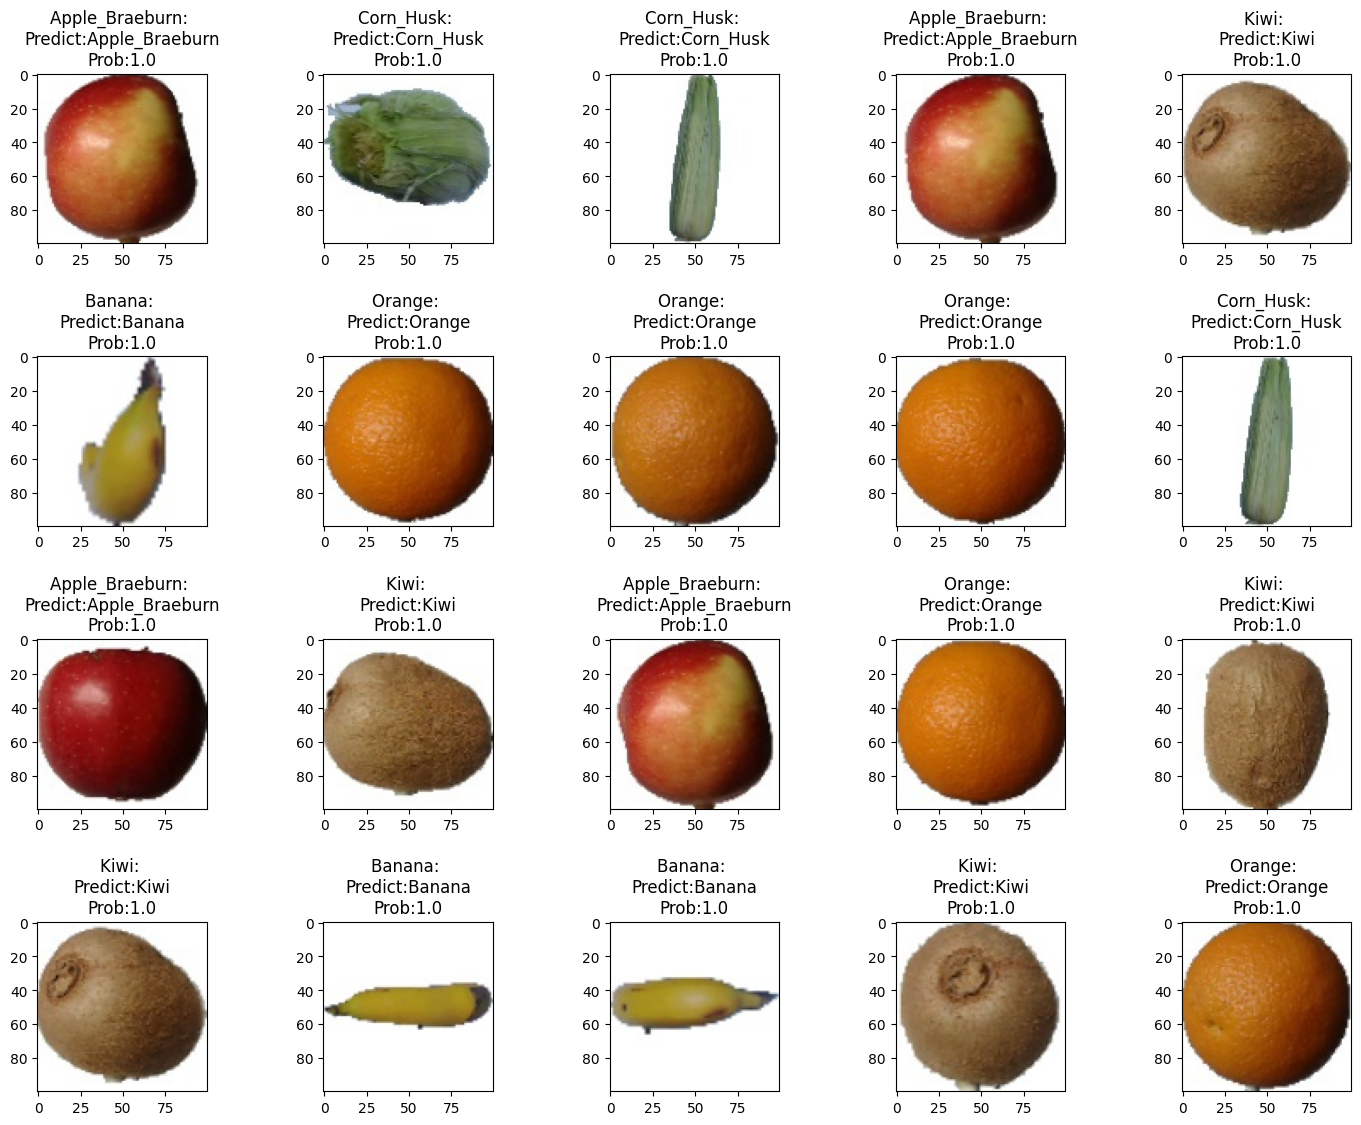

In [ ]:
sample_picture()

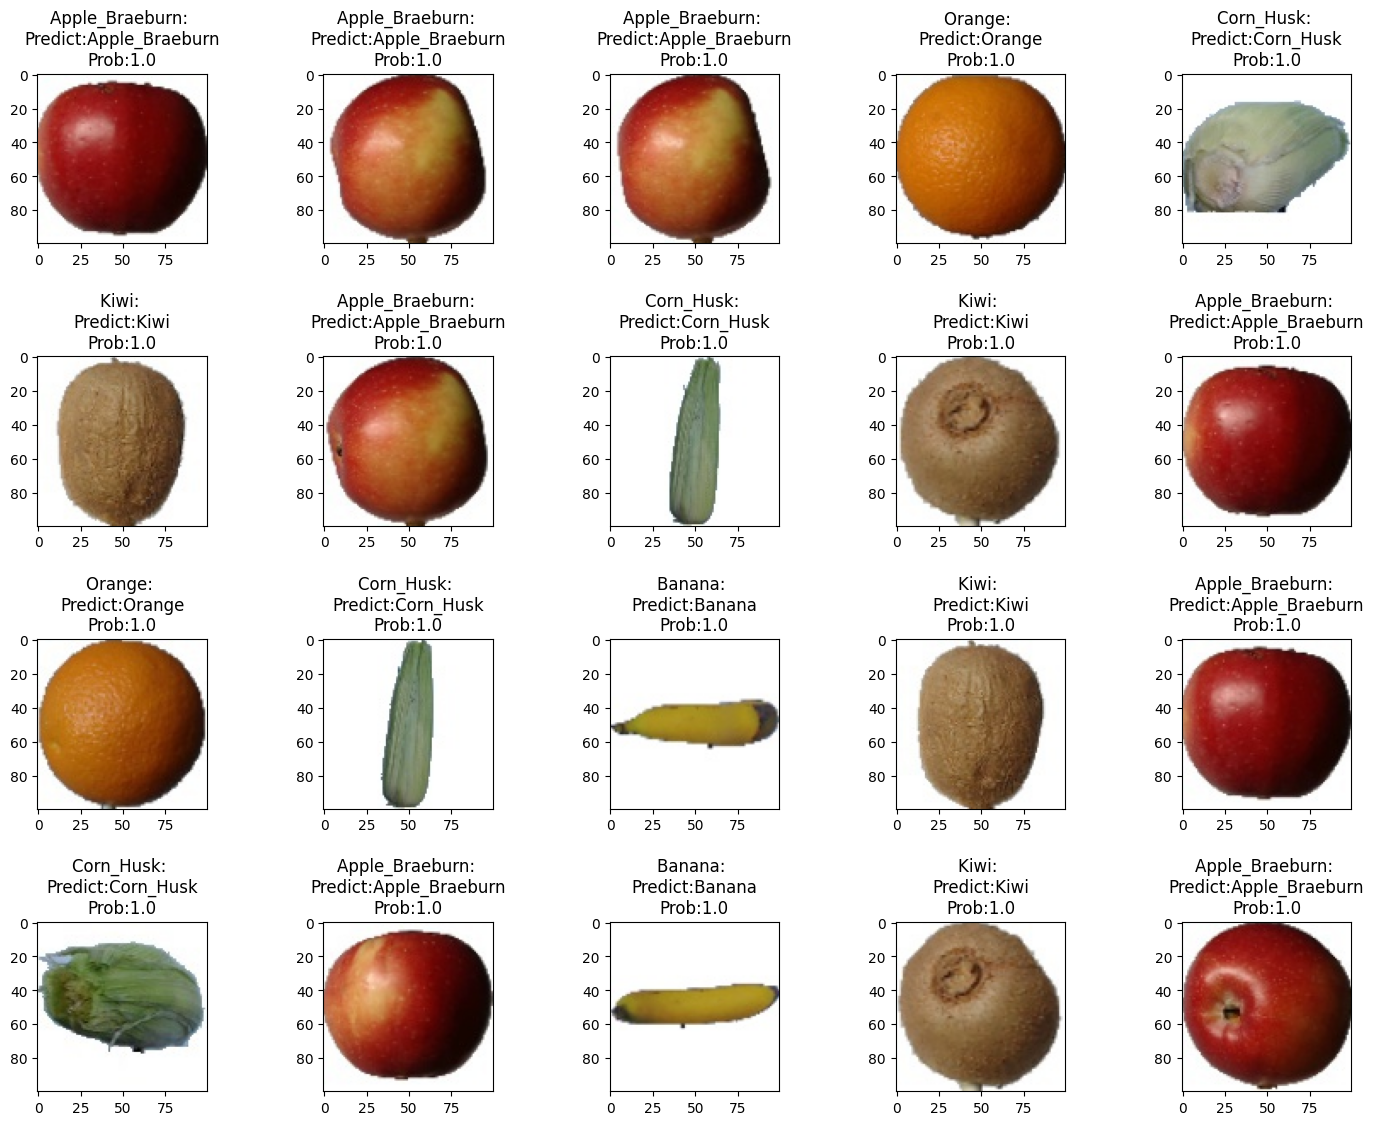

In [ ]:
sample_picture()

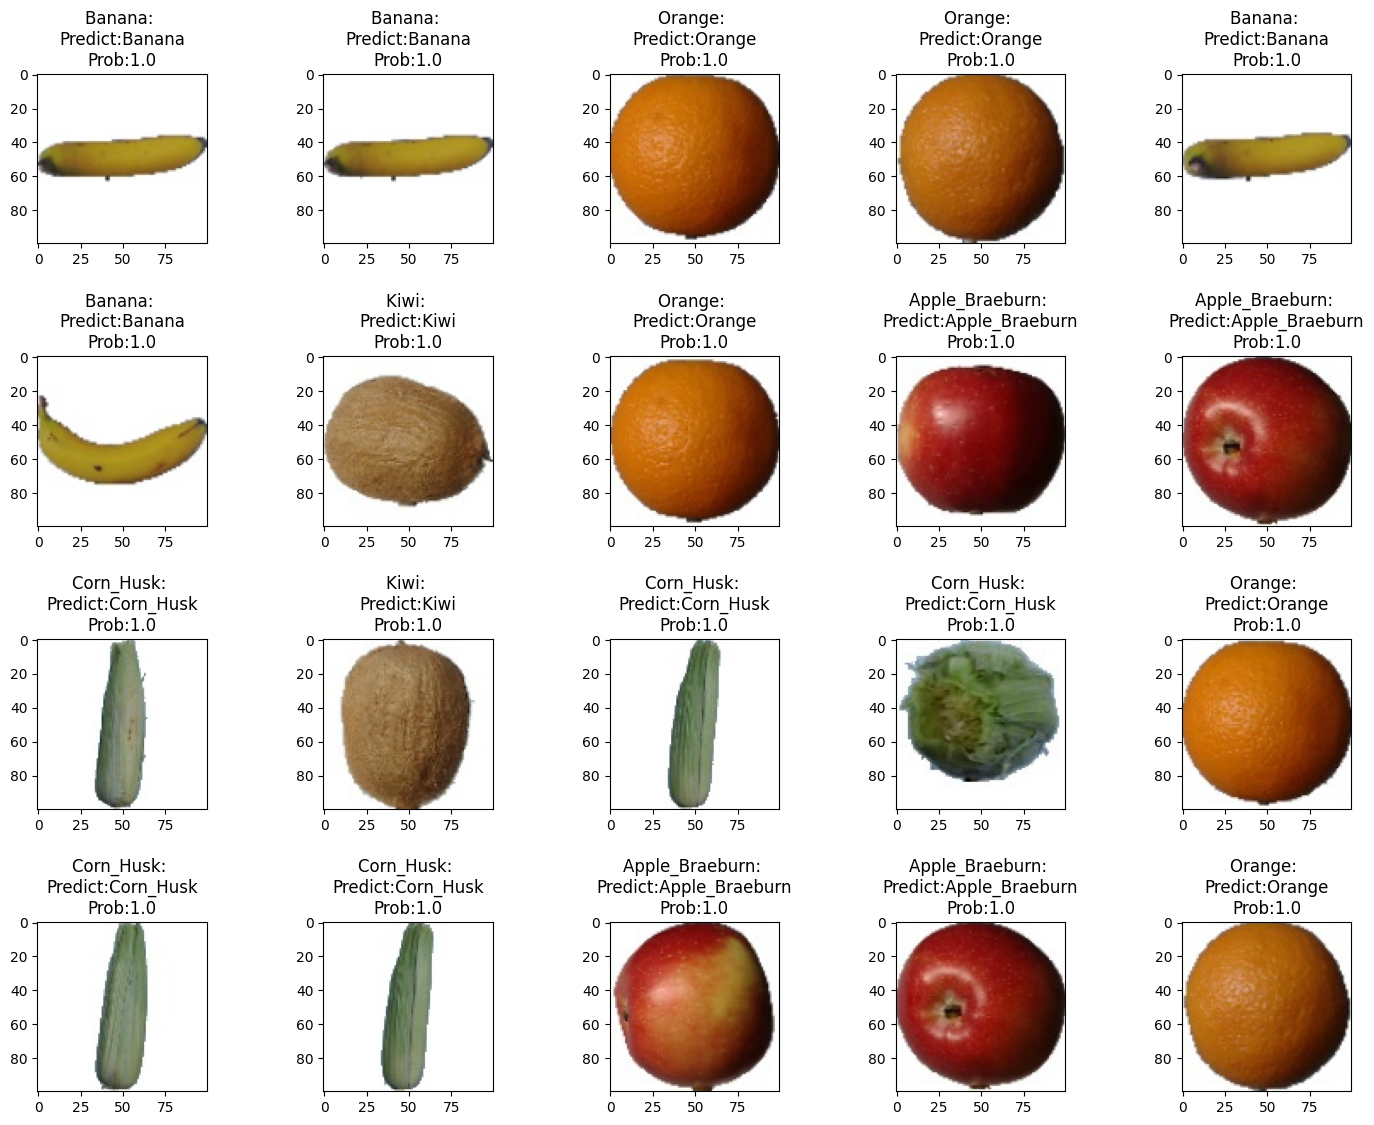

In [ ]:
sample_picture()

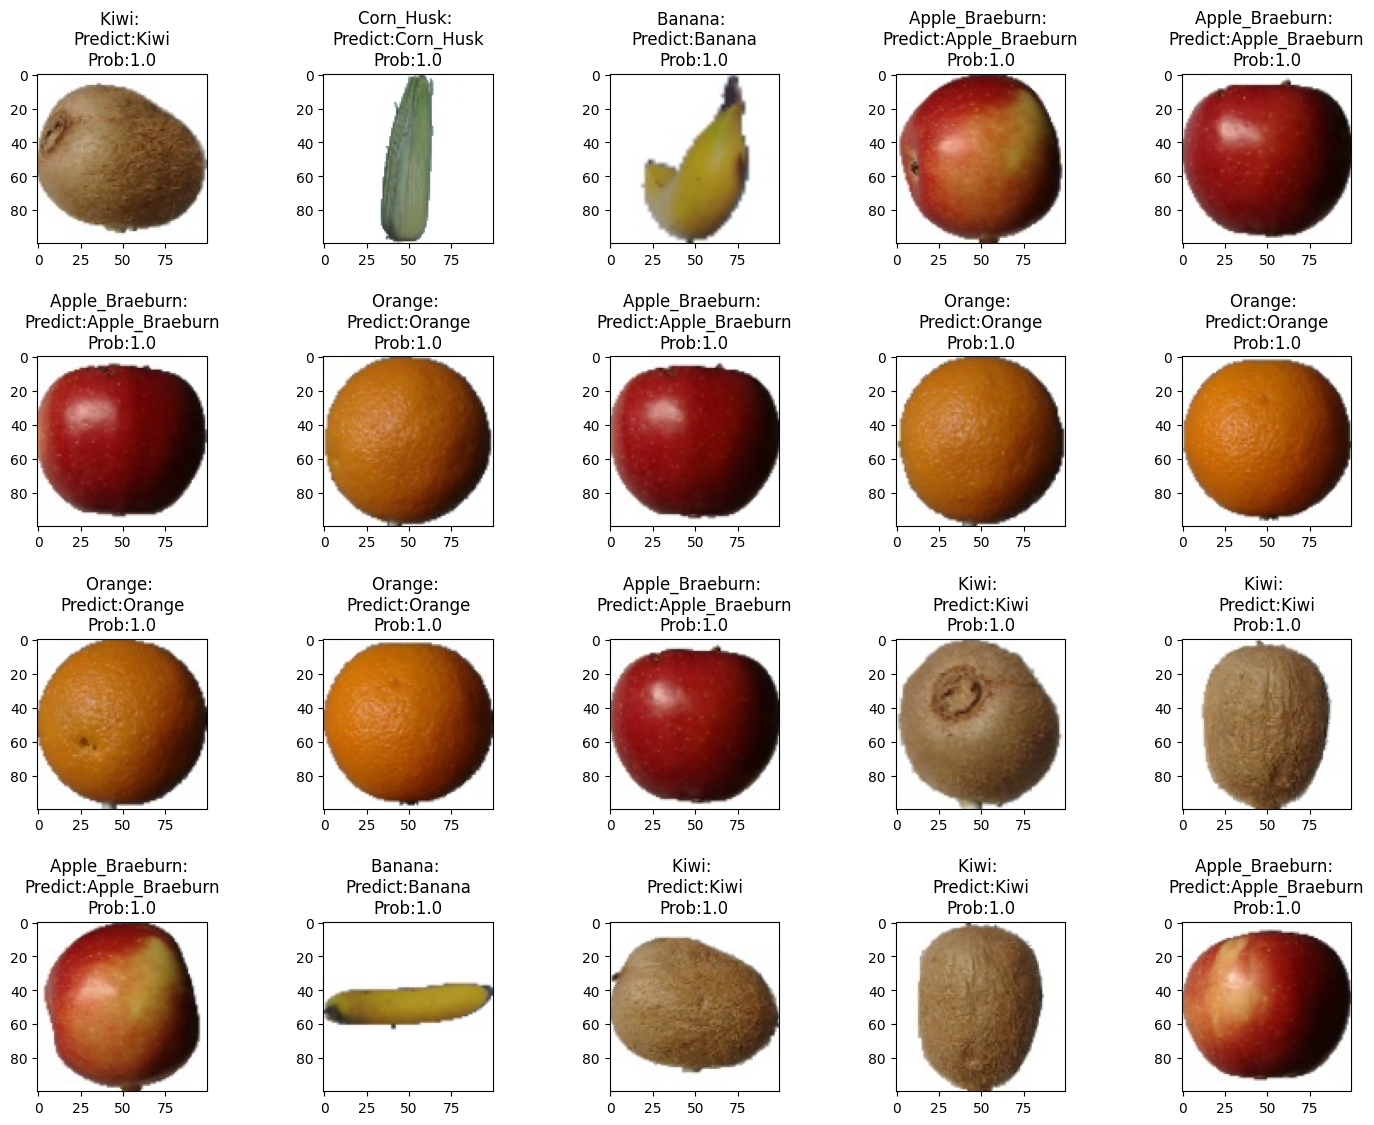

In [ ]:
sample_picture()

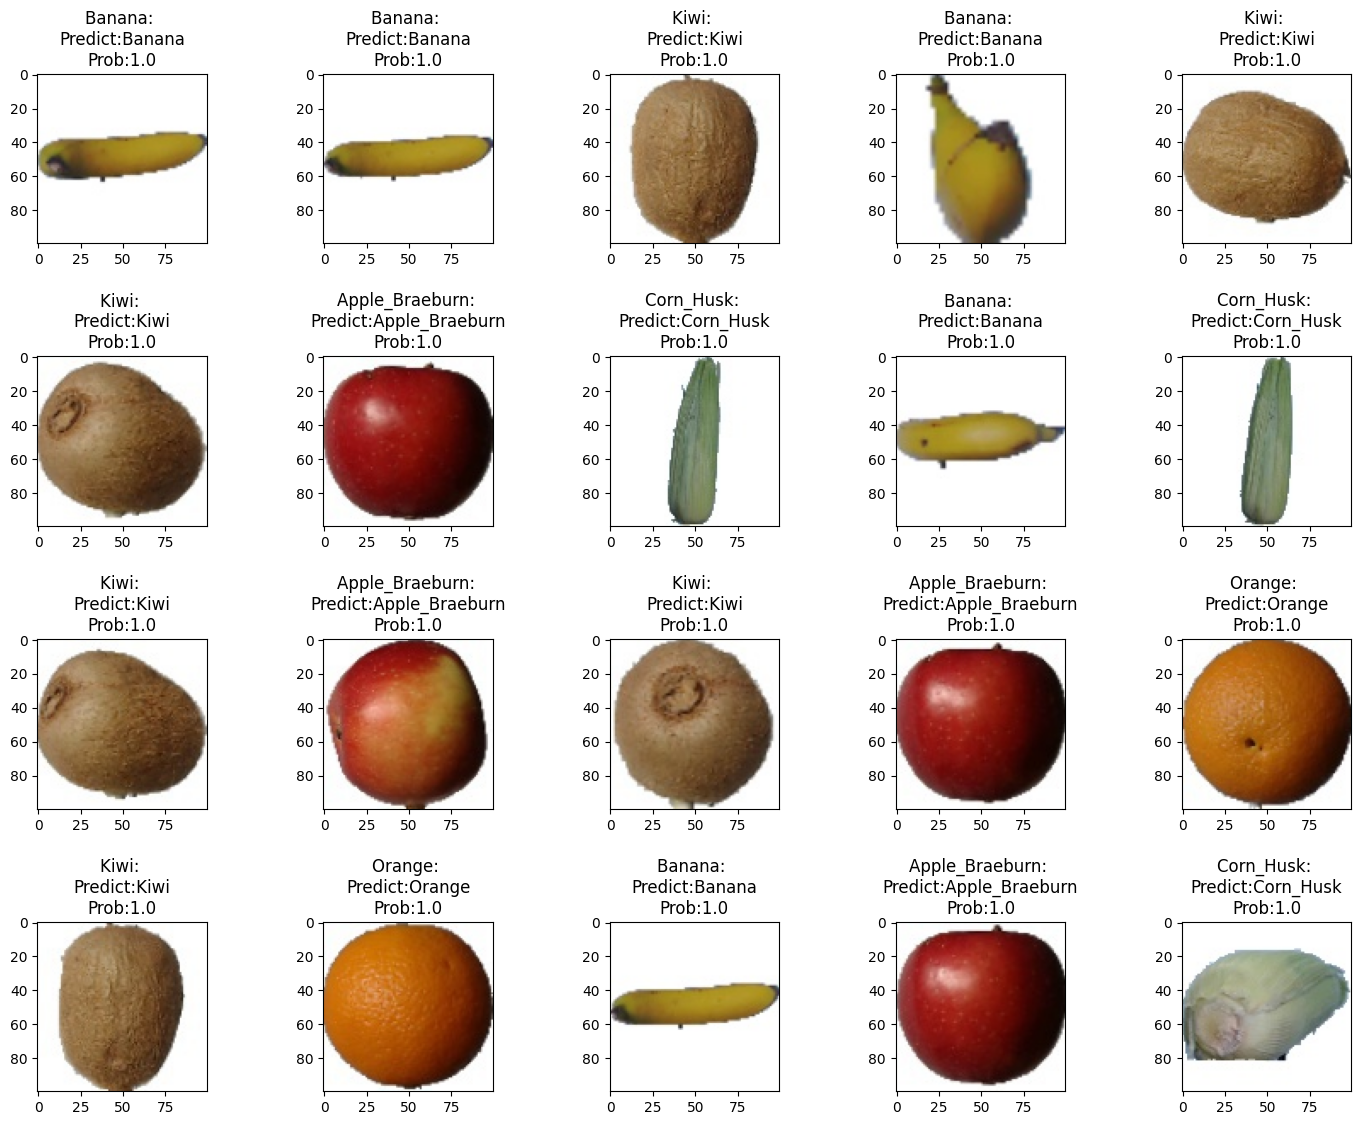

In [ ]:
sample_picture()

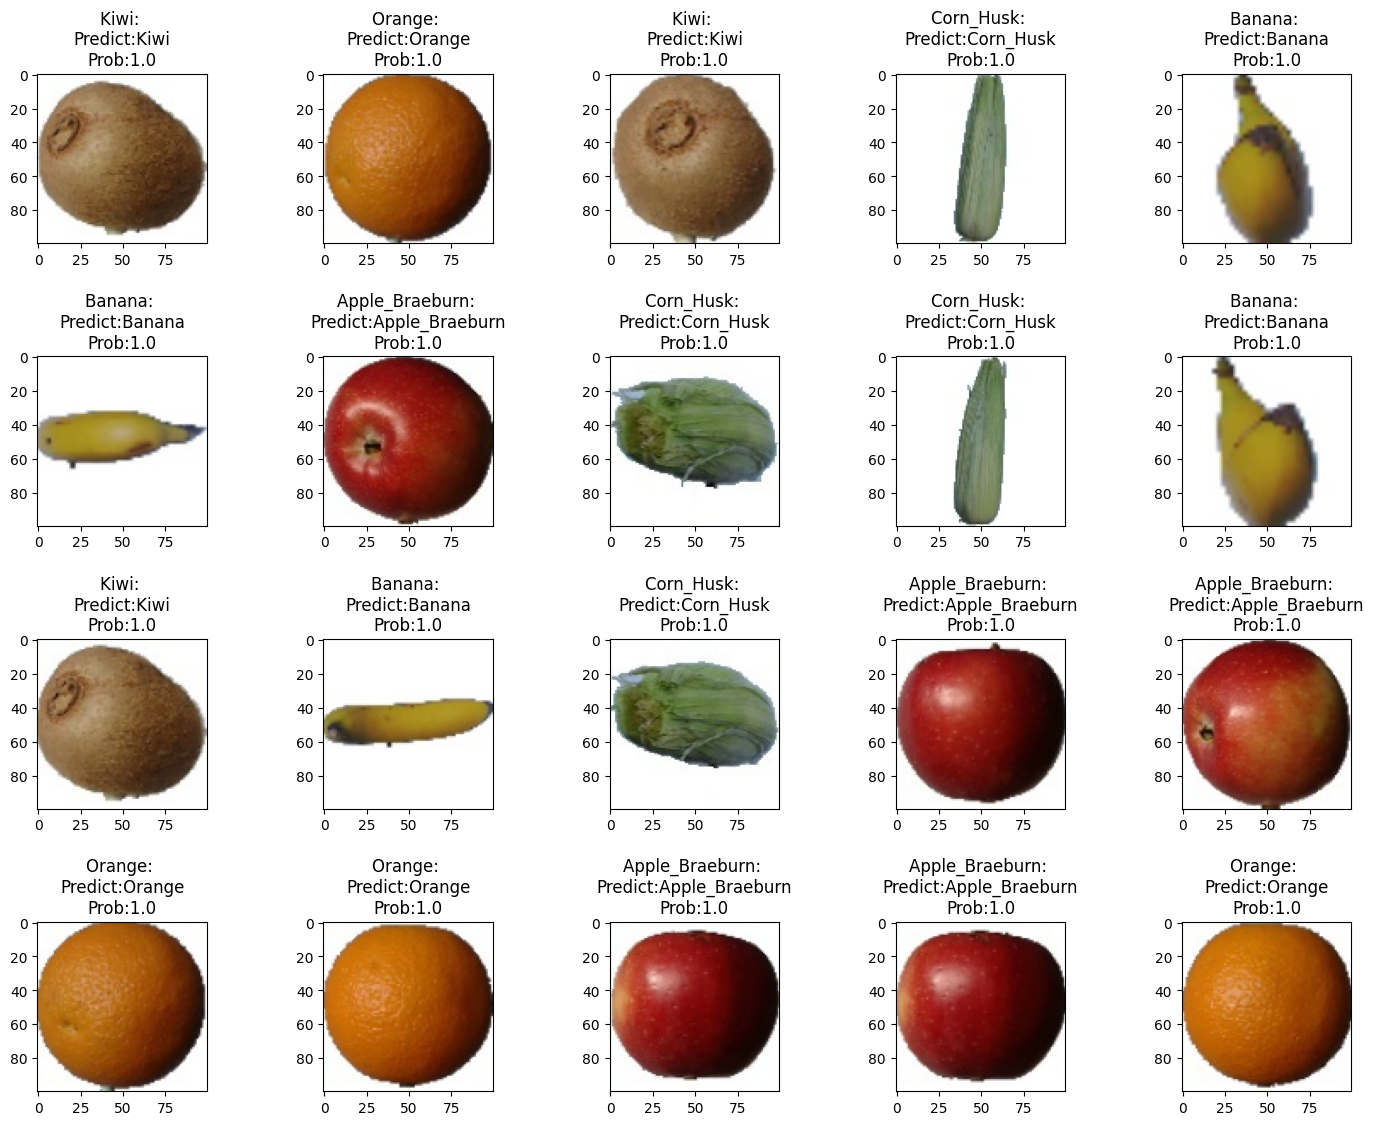

In [ ]:
sample_picture()

## Outsite data testing

In [ ]:
!wget https://universe.roboflow.com/ds/fx3tNSqjNJ?key=N4VBuJEAJf

In [ ]:
!unzip /content/fx3tNSqjNJ?key=N4VBuJEAJf

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/train/_classes.csv')

In [ ]:
#Count all value in train data set
train_df[(train_df == 1)].sum()

In [ ]:
#Sum all Sphere fiber fragment sheet sum = 1 if one class sum >1 is multiclass
train_df['Sum'] = train_df[' Sphere'] + train_df[' fiber'] + train_df[' fragment'] + train_df[' sheet']

In [ ]:
# Count Multiclass pictures
train_df[(train_df['Sum']> 1)].count()

In [ ]:
# Delete multiclass picture
train_df = train_df[train_df['Sum'] == 1]

In [ ]:
# Count remain
train_df[(train_df == 1)].sum()

In [ ]:
# Seperate in to dataset/Sphere , dataset/fiber, dataset/fragment, dataset/sheet,
import os
import shutil

# read the file names and classes into a pandas dataframe
df =train_df

# define the source and destination directories
src_dir = '/content/train'
dst_dir = '/content/dataset'

# loop through each row in the dataframe
for idx, row in df.iterrows():
    # get the filename and class label
    filename = row['filename']

    # check if the class label is 1
    if row[' Sphere'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir,'Sphere')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' fiber'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'fiber')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' fragment'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'fragment')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)
    elif row[' sheet'] == 1:
        # create the destination directory if it doesn't exist
        dst_subdir = os.path.join(dst_dir, 'sheet')
        os.makedirs(dst_subdir, exist_ok=True)

        # copy the file to the destination directory
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_subdir, filename)
        shutil.copyfile(src_path, dst_path)


In [ ]:
#Making df of another for random
import os
import pandas as pd
from PIL import Image

# create an empty list to store image paths
image_paths = []

# loop through each subfolder in the "Image" directory
for root, dirs, files in os.walk('/content/dataset'):
    for subfolder_name in dirs:
        # get the path to the subfolder
        subfolder_path = os.path.join(root, subfolder_name)
        # loop through each file in the subfolder
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            image_paths.append((image_path, subfolder_name))

# create a DataFrame from the list of image paths
other_df = pd.DataFrame(image_paths, columns=['path', 'subfolder_name'])


In [ ]:
other_df.head()

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
sample_picture(df=other_df)

In [ ]:
!cp /content/mobilenetv3_large_100_checkpoint_fold0.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold1.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold2.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold3.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3
!cp /content/mobilenetv3_large_100_checkpoint_fold4.pt /content/drive/MyDrive/Datasets/Trial15_mobienetv3

In [ ]:
!nvidia-smi